In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar los datos
data = pd.read_csv('dataset/salary_prediction_data.csv')

# Mostrar los primeros registros
print(data.head())

# Mostrar tamaño del dataset
print(data.shape)

#Revisar datos nulos
print(data.isnull().sum())

     Education  Experience  Location Job_Title  Age  Gender         Salary
0  High School           8     Urban   Manager   63    Male   84620.053665
1          PhD          11  Suburban  Director   59    Male  142591.255894
2     Bachelor          28  Suburban   Manager   61  Female   97800.255404
3  High School          29     Rural  Director   45    Male   96834.671282
4          PhD          25     Urban   Analyst   26  Female  132157.786175
(1000, 7)
Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64


In [14]:
# Codificar variables categóricas
codificadores_etiquetas = {}
columnas_categorias = ['Education', 'Location', 'Job_Title', 'Gender']
for column in columnas_categorias:
    codificadores_etiquetas[column] = LabelEncoder()
    data[column] = codificadores_etiquetas[column].fit_transform(data[column])

In [15]:
# Dividir los datos en características (X) y objetivo (y)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

     Education  Experience  Location  Job_Title  Age  Gender
29           1          14         2          0   61       0
535          1           7         2          1   21       1
695          2          11         0          1   22       0
557          3           4         1          0   60       0
836          0          17         0          3   63       0
29      75559.244114
535     85397.137796
695    112787.349256
557    107455.134948
836    108464.320139
Name: Salary, dtype: float64


In [16]:
# Crear y entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [18]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 11272.808268108052


In [19]:
# Visualizar las primeras predicciones
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

            Actual      Predicted
521   86677.840109   79724.970542
737   56036.163010   60987.630871
740   92226.871819  101281.660589
660  100710.088052   98899.265557
411   91775.012832   98458.318915


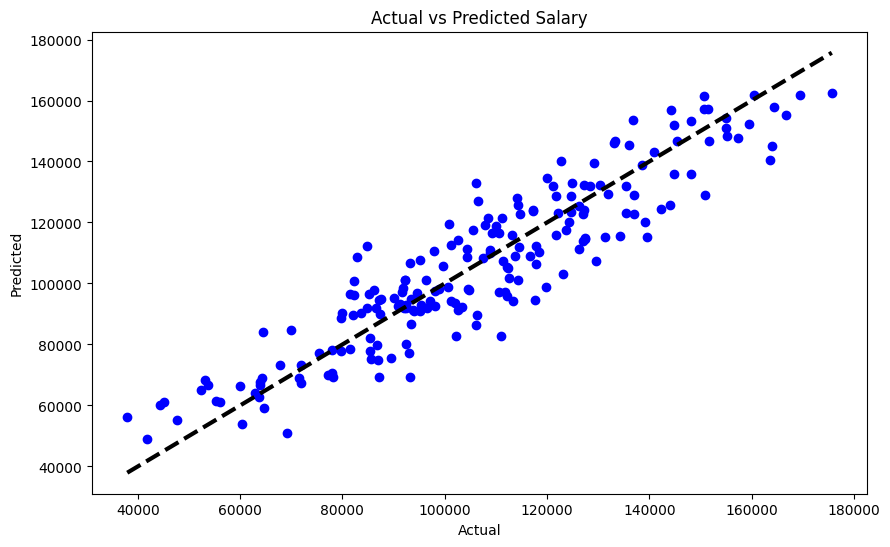

In [20]:
# Gráfico de dispersión para comparar los valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary')
plt.show()